In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.simplefilter(action='ignore')

In [3]:
data = pd.read_csv('D:\\Machine_learning_data\\cardata.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [5]:
data.shape

(301, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
data['Year']

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64

In [10]:
np.max(data['Year'])

2018

In [11]:
data['Age'] = 2019 - data['Year']
data.drop('Year', axis=1, inplace=True)

In [12]:
data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


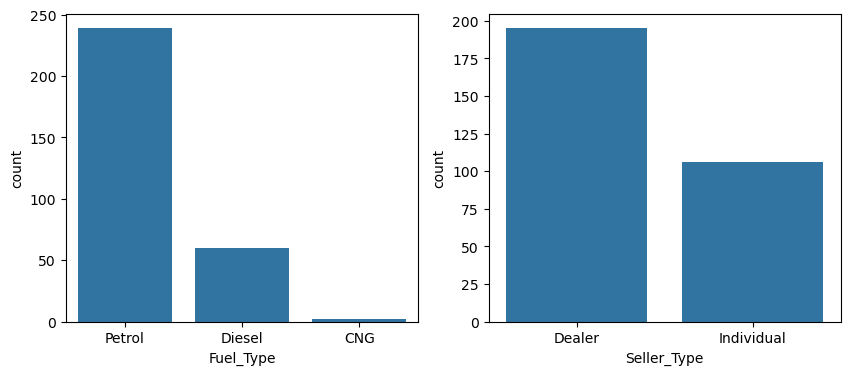

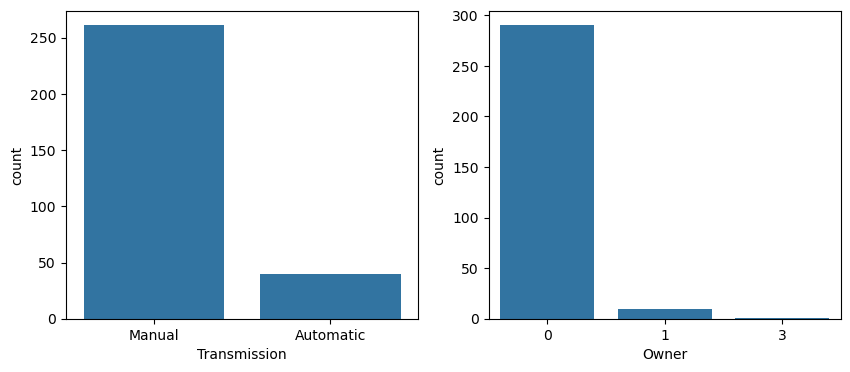

In [13]:
categorical = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=categorical[i], data=data)
    i += 1
    plt.subplot(1,2,2)
    sns.countplot(x=categorical[i], data=data)
    i += 1
    plt.show()

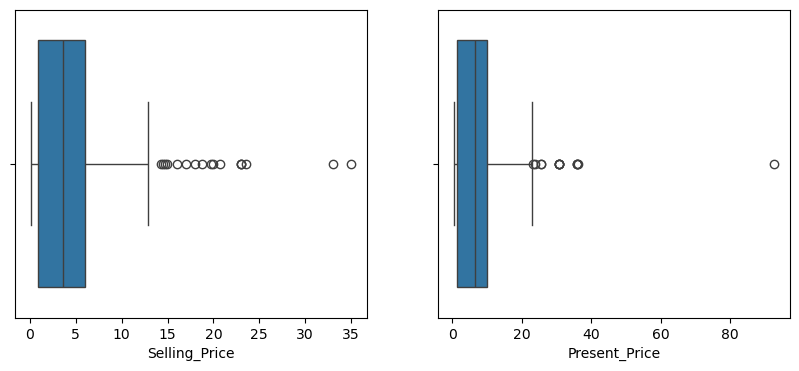

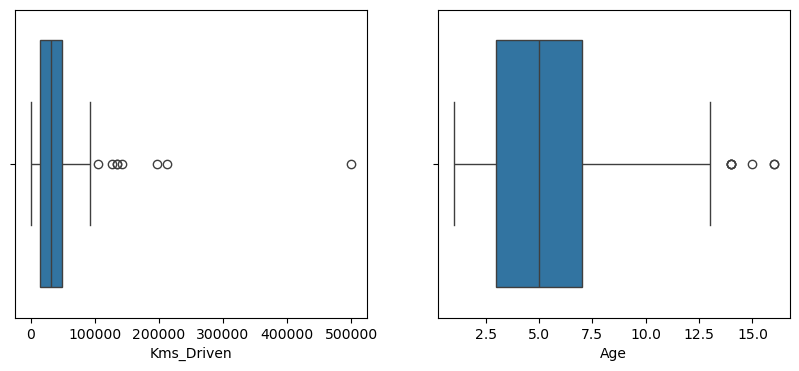

In [14]:
numerical = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.boxplot(x=numerical[i], data=data)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=numerical[i], data=data)
    i += 1
    plt.show()

In [15]:
data.corr(numeric_only=True)

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,0.182104,1.000000


In [16]:
print(pd.unique(data['Fuel_Type']))
print(pd.unique(data['Seller_Type']))
print(pd.unique(data['Transmission']))
print(pd.unique(data['Owner']))

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [17]:
data['Fuel_Type'].replace({'Petrol':2, 'Diesel':3, 'CNG':4}, inplace=True)
data['Seller_Type'].replace({'Dealer':2, 'Individual':3}, inplace=True)
data['Transmission'].replace({'Manual':2, 'Automatic':3}, inplace=True)
data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,2,2,2,0,5
1,sx4,4.75,9.54,43000,3,2,2,0,6
2,ciaz,7.25,9.85,6900,2,2,2,0,2
3,wagon r,2.85,4.15,5200,2,2,2,0,8
4,swift,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,3,2,2,0,3
297,brio,4.00,5.90,60000,2,2,2,0,4
298,city,3.35,11.00,87934,2,2,2,0,10
299,city,11.50,12.50,9000,3,2,2,0,2


In [18]:
data.drop(labels='Car_Name', axis=1, inplace=True)
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [19]:
#creat model

In [20]:
x = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print('x train', x_train.shape)
print('x test', x_test.shape)
print('y train', y_train.shape)
print('y test', y_test.shape)

x train (240, 7)
x test (61, 7)
y train (240,)
y test (61,)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [23]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(x_test)

In [25]:
print(f"Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error (RMSE): {metrics.root_mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {metrics.r2_score(y_test, y_pred)}")

Mean Absolute Error (MAE): 1.1530045916158913
Mean Squared Error (MSE): 3.287646085715838
Root Mean Squared Error (RMSE): 1.813186721139287
R2 Score: 0.8484549412090379


In [26]:
#improve model

In [27]:
k_fold = KFold(10)
print(cross_val_score(model, x, y.ravel(), cv=k_fold, n_jobs=1))

[ 6.63522141e-01  8.80842763e-01  7.23708463e-01  8.63126108e-01
 -4.36488306e+01 -1.07944231e+03 -3.50129071e-01  7.84378582e-01
  8.27975783e-01  8.74089252e-01]


In [28]:
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [29]:
len(data)/10

30.1

In [30]:
data1 = data.iloc[:120]
data2 = data.iloc[120:210]
data3 = pd.concat([data1, data2])
data3.reset_index(drop=True, inplace=True)
data3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
205,5.25,5.70,3493,2,2,2,1,3
206,5.75,7.13,12479,2,2,2,0,2
207,5.15,5.70,34797,2,2,3,0,4
208,7.90,8.10,3435,2,2,2,0,2


In [31]:
x2 = data3.drop('Selling_Price', axis=1)
y2 = data3['Selling_Price']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=1)
model2 = LinearRegression()
model2.fit(x_train2, y_train2)

LinearRegression()

In [32]:
y_pred2 = model2.predict(x_test2)

In [33]:
print(f"Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test2, y_pred2)}")
print(f"Mean Squared Error (MSE): {metrics.mean_squared_error(y_test2, y_pred2)}")
print(f"Root Mean Squared Error (RMSE): {metrics.root_mean_squared_error(y_test2, y_pred2)}")
print(f"R2 Score: {metrics.r2_score(y_test2, y_pred2)}")

Mean Absolute Error (MAE): 1.3374111329258689
Mean Squared Error (MSE): 3.558891215073796
Root Mean Squared Error (RMSE): 1.886502376111357
R2 Score: 0.8667002393048748


In [34]:
print('Model intercept=', model2.intercept_)
print('Model coesfs=', model2.coef_)

Model intercept= -4.530460636049559
Model coesfs= [ 4.10142666e-01 -7.48046837e-06  2.77438849e+00 -8.49889889e-01
  1.87376766e+00 -9.59598470e-01 -3.37811789e-01]


In [35]:
y_pred2 = model2.predict([[11.23, 42000,1,4,6,1,10]])
y_pred2

array([6.04098037])

In [36]:
print(pd.unique(data['Fuel_Type']))
print(pd.unique(data['Seller_Type']))
print(pd.unique(data['Transmission']))
print(pd.unique(data['Owner']))

[2 3 4]
[2 3]
[2 3]
[0 1 3]


In [37]:
#Simple model

In [38]:
x = pd.DataFrame(data, columns= ['Present_Price','Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Age'])
y = data.Selling_Price.values.reshape(-1,1)
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2)

Mean Absolute Error: 1.0000326012144767
Mean Squared Error: 2.1885564456572246
Root Mean Squared Error: 1.4793770464818037
R2 Score: 0.913418172122469


In [40]:
def check(dimension, testsize):
    r2 = 0.913418172122469
    for column in x:
        new_col_name = column + str(dimension)
        new_col_val = x[column]**dimension
        x.insert(0, new_col_name, new_col_val)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
        new_model = LinearRegression()
        new_model.fit(x_train, y_train)
        y_pred = new_model.predict(x_test)
        r2_new = metrics.r2_score(y_test, y_pred)
        if r2_new < r2:
            x.drop ([new_col_name], axis=1, inplace=True)
        else:
            r2 = r2_new
    print('r2 score:', r2)

check(2, 0.2)


r2 score: 0.9311515383402565


In [41]:
x

,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...
296,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [42]:
#DotProduct features

In [43]:
Pres_Kms = x['Present_Price']*x['Kms_Driven']
Pres_Kms2 = x['Present_Price']*x['Kms_Driven2']
Pres_Fuel = x['Present_Price']*x['Fuel_Type']
Pres_Fuel2 = x['Present_Price']*x['Fuel_Type2']
Pres2_Kms = x['Present_Price2']*x['Kms_Driven']
Pres2_Kms2 = x['Present_Price2']*x['Kms_Driven2']
Pres2_Fuel = x['Present_Price2']*x['Fuel_Type']
Pres2_Fuel2 = x['Present_Price2']*x['Fuel_Type2']

In [44]:
x.insert(0,'Pres_Kms' ,Pres_Kms)
x.insert(0,'Pres_Kms2' ,Pres_Kms2)
x.insert(0,'Pres_Fuel', Pres_Fuel)
x.insert(0,'Pres_Fuel2', Pres_Fuel2)
x.insert(0,'Pres2_Kms' ,Pres2_Kms)
x.insert(0,'Pres2_Kms2' ,Pres2_Kms2)
x.insert(0,'Pres2_Fuel', Pres2_Fuel)
x.insert(0,'Pres2_Fuel2', Pres2_Fuel2)
x

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2)

Mean Absolute Error: 0.7263883169172918
Mean Squared Error: 1.1927521257643823
Root Mean Squared Error: 1.0921319177482096
R2 Score: 0.9528133444040651


In [46]:
#trying k-fold

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 5)
results = (cross_val_score(model, x, y, cv=k_fold, n_jobs=-1))
print(results)
print(np.mean(results))

[  0.92455676   0.47752024 -23.72858563   0.58594545   0.88656002]
-4.170800633720203


In [48]:
x.shape

(301, 19)

In [49]:
301/6

50.166666666666664

In [50]:
df = x[x.index<100]
df2 = x[x.index>151]
x_new = pd.concat([df, df2])
x_new.reset_index(drop = True, inplace = True)
x_new

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
245,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [51]:
y = data['Selling_Price']
y1 = y[y.index<100]
y2 = y[y.index>151]
y_new = pd.concat([y1, y2])
y_new.reset_index(drop = True, inplace = True)
y_new.shape

(249,)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2)

Mean Absolute Error: 0.6747980980277346
Mean Squared Error: 0.8403596362551958
Root Mean Squared Error: 0.916711315657877
R2 Score: 0.9771367089425416


In [53]:
#normalization

In [54]:
from sklearn import preprocessing
print(x_new[0:5])
x_new.insert(0, 'Target', y_new)
DataFrame = x_new
DataFrame
Scaler = preprocessing.StandardScaler().fit(DataFrame)
Norm = Scaler.transform(DataFrame.astype(float))
print(Norm[0:5])

   Pres2_Fuel2  Pres2_Fuel    Pres2_Kms2    Pres2_Kms  Pres_Fuel2  Pres_Fuel  \
0     124.9924     62.4962  2.277986e+10   843698.700       22.36      11.18   
1     819.1044    273.0348  1.682804e+11  3913498.800       85.86      28.62   
2     388.0900    194.0450  4.619241e+09   669455.250       39.40      19.70   
3      68.8900     34.4450  4.656964e+08    89557.000       16.60       8.30   
4     424.7721    141.5907  8.504893e+10  2003508.405       61.83      20.61   

      Pres_Kms2  Pres_Kms  Owner2  Fuel_Type2  Kms_Driven2  Present_Price2  \
0  4.075110e+09  150930.0       0           4    729000000         31.2481   
1  1.763946e+10  410220.0       0           9   1849000000         91.0116   
2  4.689585e+08   67965.0       0           4     47610000         97.0225   
3  1.122160e+08   21580.0       0           4     27040000         17.2225   
4  1.237976e+10  291631.5       0           9   1802002500         47.1969   

   Present_Price  Kms_Driven  Fuel_Type  Seller_Ty

In [55]:
x_norm = DataFrame.drop(['Target'], axis=1)
y_norm = DataFrame['Target'].values.reshape(-1,1)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2)

Mean Absolute Error: 0.6747980980277346
Mean Squared Error: 0.8403596362551958
Root Mean Squared Error: 0.916711315657877
R2 Score: 0.9771367089425416


In [57]:
x_new.drop(['Target'], axis=1, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2)

Mean Absolute Error: 0.6747980980277346
Mean Squared Error: 0.8403596362551958
Root Mean Squared Error: 0.916711315657877
R2 Score: 0.9771367089425416


In [58]:
x_test

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,139.240000,69.620000,1.039263e+09,1.902018e+05,23.600,11.800,1.761462e+08,32237.60,0,4,29855296,34.810000,5.900,5464,2,2,2,0,3
168,78.499600,39.249800,2.907088e+10,7.553232e+05,17.720,8.860,6.562275e+09,170501.84,0,4,1481326144,19.624900,4.430,38488,2,2,2,0,2
76,862.009600,431.004800,1.117164e+12,1.551617e+07,58.720,29.360,7.610112e+10,1056960.00,0,4,5184000000,215.502400,14.680,72000,2,2,2,0,6
150,129.960000,64.980000,2.583735e+10,9.162180e+05,22.800,11.400,4.532868e+09,160740.00,0,4,795240000,32.490000,5.700,28200,2,2,2,0,4
145,1.040400,0.520200,2.832489e+08,8.583300e+03,2.040,1.020,5.553900e+08,16830.00,0,4,1089000000,0.260100,0.510,33000,2,3,2,0,9
73,130.416400,65.208200,6.028498e+10,1.401976e+06,22.840,11.420,1.055779e+10,245530.00,0,4,1849000000,32.604100,5.710,43000,2,2,2,0,8
45,579.846400,289.923200,3.261636e+10,2.174424e+06,48.160,24.080,2.709000e+09,180600.00,0,4,225000000,144.961600,12.040,15000,2,2,3,0,5
159,1968.696900,656.232300,4.145849e+11,9.523024e+06,133.110,44.370,2.803143e+10,643882.65,0,9,1895296225,218.744100,14.790,43535,3,2,2,0,4
218,400.000000,200.000000,4.808174e+11,6.934100e+06,40.000,20.000,4.808174e+10,693410.00,0,4,4808174281,100.000000,10.000,69341,2,2,2,0,8
213,302.760000,151.380000,3.401811e+10,1.604628e+06,34.800,17.400,3.910128e+09,184440.00,0,4,449440000,75.690000,8.700,21200,2,2,2,0,2


In [59]:
x_test.insert(0, 'y_test', y_test)
x_test.insert(0, 'y_pred', y_pred)
x_test

,y_pred,y_test,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,...,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,5.048383,5.30,139.240000,69.620000,1.039263e+09,1.902018e+05,23.600,11.800,1.761462e+08,32237.60,...,4,29855296,34.810000,5.900,5464,2,2,2,0,3
168,3.905950,3.50,78.499600,39.249800,2.907088e+10,7.553232e+05,17.720,8.860,6.562275e+09,170501.84,...,4,1481326144,19.624900,4.430,38488,2,2,2,0,2
76,5.338838,5.50,862.009600,431.004800,1.117164e+12,1.551617e+07,58.720,29.360,7.610112e+10,1056960.00,...,4,5184000000,215.502400,14.680,72000,2,2,2,0,6
150,4.209394,4.40,129.960000,64.980000,2.583735e+10,9.162180e+05,22.800,11.400,4.532868e+09,160740.00,...,4,795240000,32.490000,5.700,28200,2,2,2,0,4
145,-0.527171,0.16,1.040400,0.520200,2.832489e+08,8.583300e+03,2.040,1.020,5.553900e+08,16830.00,...,4,1089000000,0.260100,0.510,33000,2,3,2,0,9
73,2.813552,2.65,130.416400,65.208200,6.028498e+10,1.401976e+06,22.840,11.420,1.055779e+10,245530.00,...,4,1849000000,32.604100,5.710,43000,2,2,2,0,8
45,9.412311,7.50,579.846400,289.923200,3.261636e+10,2.174424e+06,48.160,24.080,2.709000e+09,180600.00,...,4,225000000,144.961600,12.040,15000,2,2,3,0,5
159,10.395962,11.75,1968.696900,656.232300,4.145849e+11,9.523024e+06,133.110,44.370,2.803143e+10,643882.65,...,9,1895296225,218.744100,14.790,43535,3,2,2,0,4
218,3.807679,4.10,400.000000,200.000000,4.808174e+11,6.934100e+06,40.000,20.000,4.808174e+10,693410.00,...,4,4808174281,100.000000,10.000,69341,2,2,2,0,8
213,6.978528,6.50,302.760000,151.380000,3.401811e+10,1.604628e+06,34.800,17.400,3.910128e+09,184440.00,...,4,449440000,75.690000,8.700,21200,2,2,2,0,2


In [60]:
new_df = x_test.sort_values(by='Present_Price')

In [61]:
a = new_df.Present_Price
b = new_df.y_test
c = new_df.Present_Price
d = new_df.y_pred

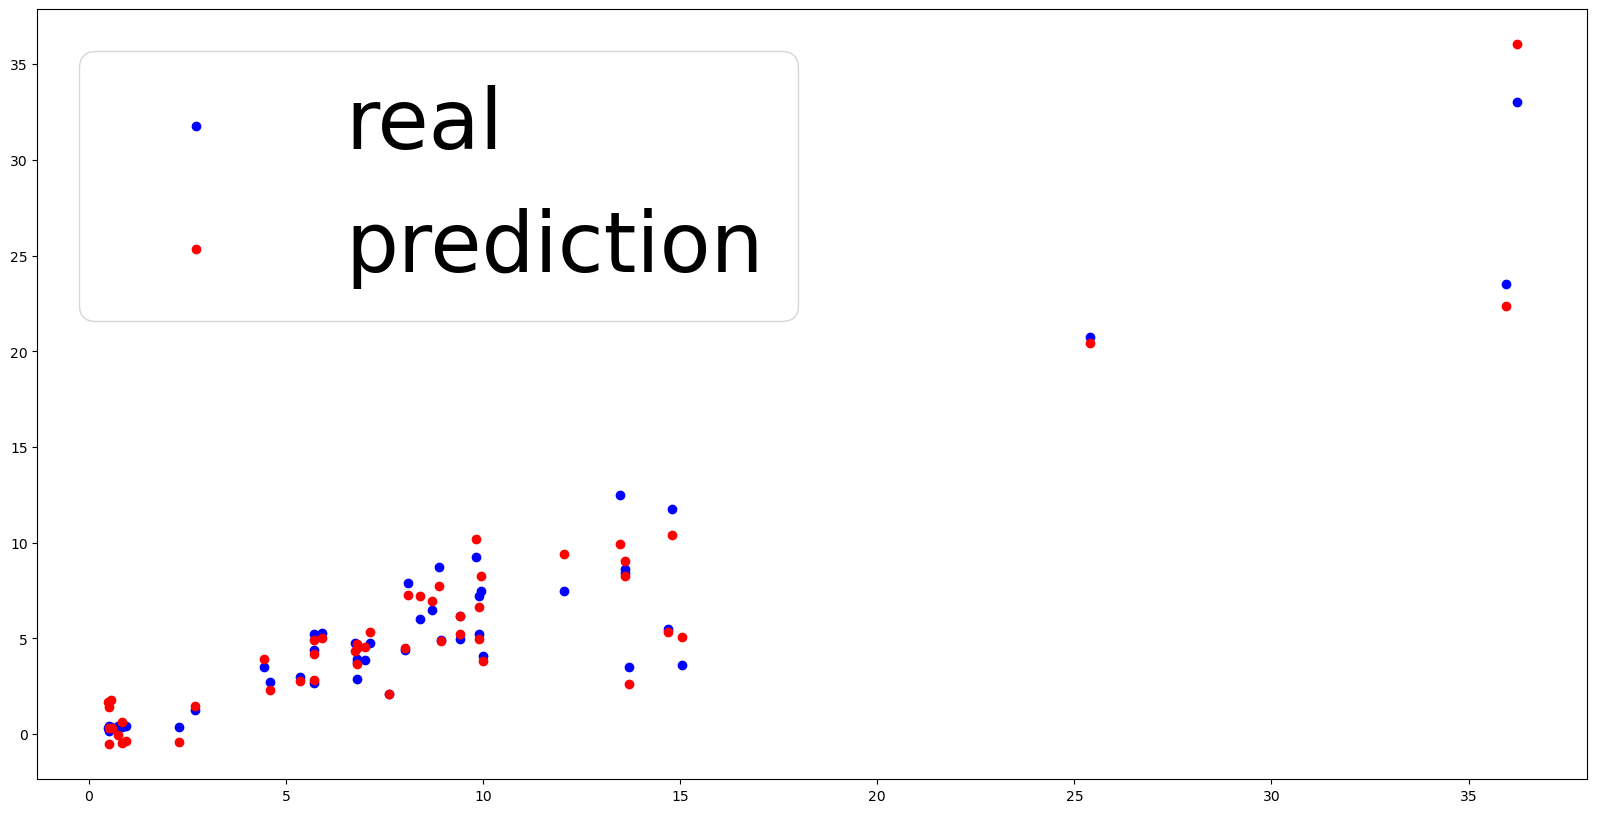

In [62]:
plt.figure(figsize=(20,10))
plt.scatter(a,b, color='blue', label='real')
plt.scatter(c,d, color='red', label='prediction')
plt.legend(fontsize=60)
plt.show()

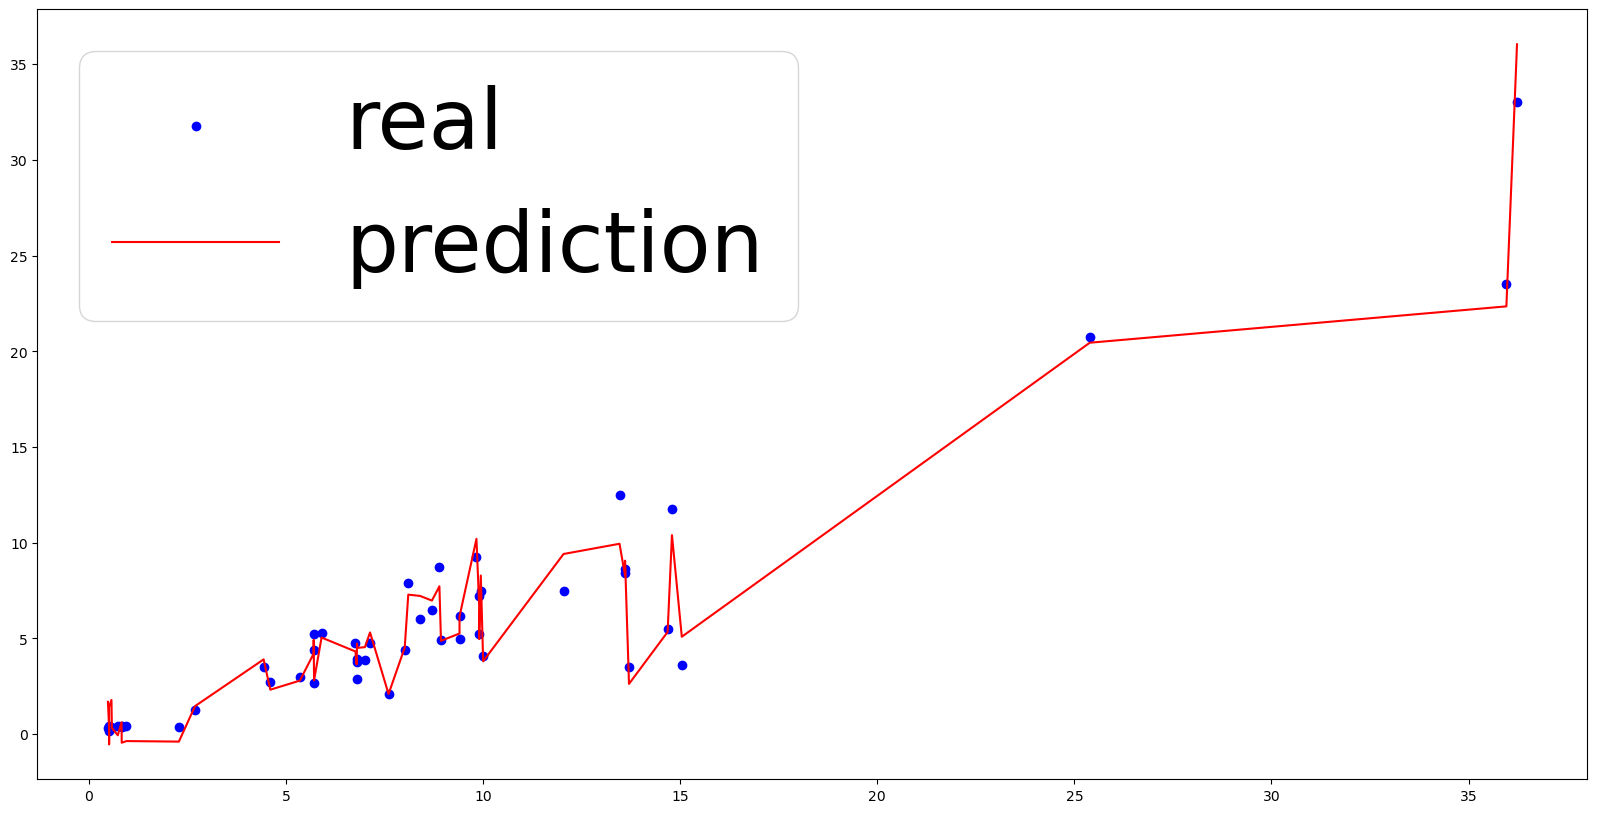

In [63]:
plt.figure(figsize=(20,10))
plt.scatter(a,b, color='blue', label='real')
plt.plot(c,d, color='red', label='prediction')
plt.legend(fontsize=60)
plt.show()

In [64]:
DataFrame.insert(0, 'Target', y_new)

In [65]:
DataFrame.columns

Index(['Target', 'Pres2_Fuel2', 'Pres2_Fuel', 'Pres2_Kms2', 'Pres2_Kms',
       'Pres_Fuel2', 'Pres_Fuel', 'Pres_Kms2', 'Pres_Kms', 'Owner2',
       'Fuel_Type2', 'Kms_Driven2', 'Present_Price2', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
       'Age'],
      dtype='object')

In [66]:
Present_price = 11.23
KMS_driven = 42000
Fuel_type = 2 #petrol
Seller_type = 2 #dealer
Transmission = 2 #manual
Owner = 1
Age = 10

Model_Input = pd.DataFrame({'Target':10,
                            'Pres2_Fuel2':[((Present_price**2)*(Fuel_type**2))],
                            'Pres2_Fuel':[((Present_price**2)*(Fuel_type))],
                            'Pres2_Kms2':[((Present_price**2)*(KMS_driven**2))],
                            'Pres2_Kms':[((Present_price**2)*(KMS_driven))],
                            'Pres_Fuel2':[((Present_price)*(Fuel_type**2))],
                            'Pres_Fuel':[((Present_price)*(Fuel_type))],
                            'Pres_Kms2':[((Present_price)*(KMS_driven**2))],
                            'Pres_Kms':[((Present_price)*(KMS_driven))],
                            'Owner2':[Owner**2],
                            'Fuel_Type2': [Fuel_type**2],
                            'KMS_Driven2': [KMS_driven**2],
                            'Present_Price2': [Present_price**2],
                            'Present_Price': [Present_price],
                            'KMS_Driven': [KMS_driven],
                            'Fuel_Type': [Fuel_type],
                            'Seller_Type': [Seller_type],
                            'Transmission': [Transmission],
                            'Owner': [Owner],
                            'Age': [Age]})

In [67]:
Model_Input

,Target,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,KMS_Driven2,Present_Price2,Present_Price,KMS_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,10,504.4516,252.2258,2.224632e+11,5296741.8,44.92,22.46,1.980972e+10,471660.0,1,4,1764000000,126.1129,11.23,42000,2,2,2,1,10


In [68]:
Finall = pd.concat([DataFrame, Model_Input])

In [69]:
Finall

,Target,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,...,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,KMS_Driven2,KMS_Driven
0,3.35,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,...,31.2481,5.59,27000.0,2,2,2,0,5,NaN,NaN
1,4.75,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,...,91.0116,9.54,43000.0,3,2,2,0,6,NaN,NaN
2,7.25,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,...,97.0225,9.85,6900.0,2,2,2,0,2,NaN,NaN
3,2.85,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,...,17.2225,4.15,5200.0,2,2,2,0,8,NaN,NaN
4,4.60,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,...,47.1969,6.87,42450.0,3,2,2,0,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,4.00,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,...,34.8100,5.90,60000.0,2,2,2,0,4,NaN,NaN
246,3.35,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,...,121.0000,11.00,87934.0,2,2,2,0,10,NaN,NaN
247,11.50,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,...,156.2500,12.50,9000.0,3,2,2,0,2,NaN,NaN
248,5.30,139.2400,69.6200,1.039263e+09,1.902018e+05,23.60,11.80,1.761462e+08,32237.6,0,...,34.8100,5.90,5464.0,2,2,2,0,3,NaN,NaN


In [70]:
Finall = Finall.fillna(Finall.mean())
x = Finall.drop(['Target'], axis=1)[:249]
y = Finall[['Target']][:249]
x_Finall = Finall.drop(['Target'], axis=1)[249:]

In [71]:
model.fit(x,y)

LinearRegression()

In [72]:
y_pred = model.predict(x_Finall)

In [73]:
y_pred

array([[5.12679236]])